#### Imports

In [5]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Global variables

In [6]:
# The types of additive manufacturing used in this test
models = ['Aluminium','Prusa','Formlabs','Ultimaker_006','Ultimaker_010','Ultimaker_015','Ultimaker_020']

## Compressed air chamber test

In [9]:
# Define a dictionary to store all data from the air chamber tests
# For each ring all variables are stored in this nested dictionary
air_chambers = {}

# For each model type
for model in models:
    # Load the data of the corresponding results in .CSV and drop unncessary columns
    model_df = pd.read_csv(f'./data/{model}.csv',delimiter=';',header=None,names=(['Time','A','Pressure']))
    model_df.drop(columns=['A'],axis=1,inplace=True)
    
    # Store the data in our larger dictionary
    air_chambers[model]={}
    # Filtering the time data (in s)
    air_chambers[model]['Time'] = model_df['Time'].str.replace('.','').astype('float64')/1000000
    # For all models limit the time (in s) and pressure (in MPa) to the same amount 
    air_chambers[model]['Time'] = air_chambers[model]['Time'].head(1400)
    air_chambers[model]['Pressure'] = model_df['Pressure'].head(1400)/10
    
    # Define the pressure drop by reducing all pressures with the first measures pressure (in MPa)
    air_chambers[model]['PressureDrop'] = air_chambers[model]['Pressure'] - air_chambers[model]['Pressure'][0]

<ipython-input-9-158478294bcc>:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  air_chambers[model]['Time'] = model_df['Time'].str.replace('.','').astype('float64')/1000000


#### All models with their pressure drop (in MPa) over time (in s)

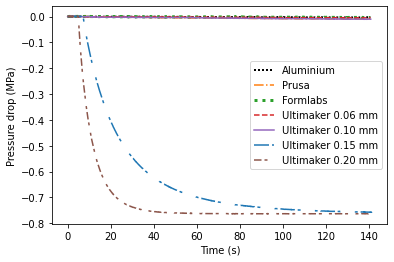

In [13]:
plt.plot(air_chambers['Aluminium']['Time'],air_chambers['Aluminium']['PressureDrop'],'black', label='Aluminium', linestyle=(0,(1,1,1)),linewidth=2)
plt.plot(air_chambers['Prusa']['Time'],air_chambers['Prusa']['PressureDrop'],'tab:orange', label='Prusa', linestyle='dashdot')
plt.plot(air_chambers['Formlabs']['Time'],air_chambers['Formlabs']['PressureDrop'],'tab:green', label='Formlabs', linestyle='dotted',linewidth=3)
plt.plot(air_chambers['Ultimaker_006']['Time'],air_chambers['Ultimaker_006']['PressureDrop'],'tab:red',label='Ultimaker 0.06 mm', linestyle='dashed')
plt.plot(air_chambers['Ultimaker_010']['Time'],air_chambers['Ultimaker_010']['PressureDrop'],'tab:purple',label='Ultimaker 0.10 mm')
plt.plot(air_chambers['Ultimaker_015']['Time'],air_chambers['Ultimaker_015']['PressureDrop'],'tab:blue',label='Ultimaker 0.15 mm', linestyle=(0,(10,2,2)))  
plt.plot(air_chambers['Ultimaker_020']['Time'],air_chambers['Ultimaker_020']['PressureDrop'],'tab:brown',label='Ultimaker 0.20 mm', linestyle=(0,(5,2,2)))

# Set the labels and save the figure
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Pressure drop (MPa)')
plt.savefig('./figures/result_airchamber.pdf',bbox_inches = 'tight')

#### Models with their pressure drop (in MPa) over time (in s) (excluding Ultimaker 0.15 mm and 0.20 mm)

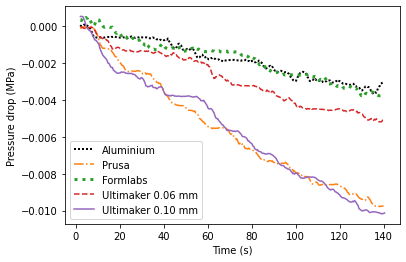

In [14]:
# To smoothen out the lines a sampling [::4] and a rolling window of 20 are applied
plt.plot(air_chambers['Aluminium']['Time'][::4],air_chambers['Aluminium']['PressureDrop'].rolling(window=20).mean()[::4],'black', label='Aluminium', linestyle=(0,(1,1,1)),linewidth=2)
plt.plot(air_chambers['Prusa']['Time'][::4],air_chambers['Prusa']['PressureDrop'].rolling(window=20).mean()[::4],'tab:orange', label='Prusa', linestyle='dashdot')
plt.plot(air_chambers['Formlabs']['Time'][::4],air_chambers['Formlabs']['PressureDrop'].rolling(window=20).mean()[::4],'tab:green', label='Formlabs', linestyle='dotted',linewidth=3)
plt.plot(air_chambers['Ultimaker_006']['Time'][::4],air_chambers['Ultimaker_006']['PressureDrop'].rolling(window=20).mean()[::4],'tab:red',label='Ultimaker 0.06 mm', linestyle='dashed')
plt.plot(air_chambers['Ultimaker_010']['Time'][::4],air_chambers['Ultimaker_010']['PressureDrop'].rolling(window=20).mean()[::4],'tab:purple',label='Ultimaker 0.10 mm')
    
# Set the labels and save the figure
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Pressure drop (MPa)')
plt.savefig('./figures/result_airchamber_part.pdf',bbox_inches = 'tight')

# Repeatability

In [18]:
Test1_repeatability=pd.read_csv(r'/Users/evazillen/Documents/Studie/Afstuderen/Thesis/1_Tests/Test1_lekdoormateriaal/Resultaten_In_en_uit_elkaar_deel.csv', delimiter=";", header=1, names=(['Time',"Test1","Test2","Test3",'Aluminium','G','SLA Prusa','SLA Formlabs','Ultimaker 0.10']))


FileNotFoundError: [Errno 2] No such file or directory: '/Users/evazillen/Documents/Studie/Afstuderen/Thesis/1_Tests/Test1_lekdoormateriaal/Resultaten_In_en_uit_elkaar_deel.csv'

In [17]:
Timer=Test1_repeatability["Time"]
T1r=Test1_repeatability["Test1"]/1000
T2r=Test1_repeatability["Test2"]/1000
T3r=Test1_repeatability["Test3"]/1000
Ar=Test1_repeatability["Aluminium"]/1000
SPr=Test1_repeatability["SLA Prusa"]/1000
SFr=Test1_repeatability["SLA Formlabs"]/1000
UBr=Test1_repeatability["Ultimaker 0.10"]/1000


NameError: name 'Test1_repeatability' is not defined

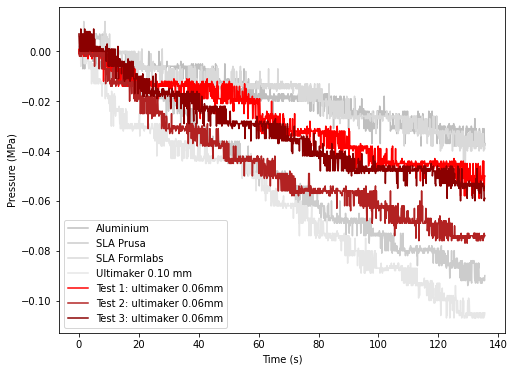

In [7]:
tr = np.arange(0, len(Timer)/10, 0.1)

plt.plot(tr,Ar, color = '0.75',label='Aluminium')
plt.plot(tr,SPr, color = '0.8',label='SLA Prusa')
plt.plot(tr,SFr, color = '0.85',label='SLA Formlabs')
# plt.plot(tr,UAr, label='Ultimaker 0.06 mm')
plt.plot(tr,UBr,color = '0.9', label='Ultimaker 0.10 mm')
plt.plot(tr,T1r,'-r', label='Test 1: ultimaker 0.06mm')
plt.plot(tr,T2r, color ='firebrick',label='Test 2: ultimaker 0.06mm')
plt.plot(tr,T3r, color = 'darkred', label='Test 3: ultimaker 0.06mm')

plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Pressure (MPa)')
plt.savefig('./figures/app_airchamber_reconnected.pdf',bbox_inches = 'tight')

In [8]:
Test1_repeatability2=pd.read_csv (r'/Users/evazillen/Documents/Studie/Afstuderen/Thesis/1_Tests/Test1_lekdoormateriaal/Resultaten_opnieuwaanzetten.csv', delimiter=";", header=1, names=(['Time',"Test1","Test2","Test3",'Aluminium','SLA Prusa','SLA Formlabs','Ultimaker 0.06mm','Ultimaker 0.10']))
# Test1_repeatability.drop(['A','B','C','D','E','F','G'],axis=1,inplace=True)

In [9]:
Timer2=Test1_repeatability2["Time"]
T1r2=Test1_repeatability2["Test1"]/1000
T2r2=Test1_repeatability2["Test2"]/1000
T3r2=Test1_repeatability2["Test3"]/1000
Ar2=Test1_repeatability2["Aluminium"]/1000
SPr2=Test1_repeatability2["SLA Prusa"]/1000
SFr2=Test1_repeatability2["SLA Formlabs"]/1000
UAr2=Test1_repeatability2["Ultimaker 0.06mm"]/1000
UBr2=Test1_repeatability2["Ultimaker 0.10"]/1000


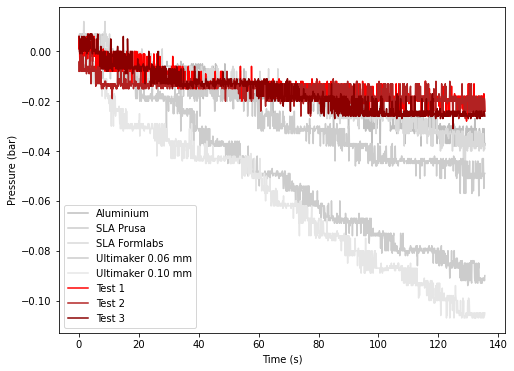

In [10]:
tr2 = np.arange(0, len(Timer)/10, 0.1)
plt.figure(figsize=(8,6))

plt.plot(tr2,Ar2, color = '0.75',label='Aluminium')
plt.plot(tr2,SPr2, color = '0.8',label='SLA Prusa')
plt.plot(tr2,SFr2, color = '0.85',label='SLA Formlabs')
plt.plot(tr,UAr2, color = '0.8', label='Ultimaker 0.06 mm')
plt.plot(tr2,UBr2,color = '0.9', label='Ultimaker 0.10 mm')
plt.plot(tr2,T1r2,'-r', label='Test 1')
plt.plot(tr2,T2r2, color ='firebrick',label='Test 2')
plt.plot(tr2,T3r2, color = 'darkred', label='Test 3')

plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Pressure (bar)')
plt.savefig('./figures/app_airchamber_rerun.pdf',bbox_inches = 'tight')